# Wind Forecasting model

**Author:** [Ettore Aquino](https://github.com/ettoreaquino)<br>
**Date created:** 2021/07/04<br>
**Last modified:** 2021/07/04<br>
**Description:** This notebook is a work proposed by the Masters Course: _Tópicos Especiais em Otimização - Técnicas Inteligentes_, offered during the Masters of Science in Electrical Engineering at _Universidade Federal de Juiz de Fora_ (Brazil)<br>
**Professor:** Dr. Leonardo Willer de Oliveira

---

## Setup

This project runs on a series of packages. But mainly on [Tensorflow](https://www.tensorflow.org/) and a special package called [Keras](https://keras.io/). Other commom packages, like [Pandas](https://pandas.pydata.org/), [Scikit-Learn](https://scikit-learn.org/stable/), [Plotly](https://plotly.com/) and [Matplotlib](https://matplotlib.org/) come in hand when preparing the data and visualizing the information being modeled.

 - **`Tensorflow`** is a Python machine learning library. Its name come from the fact that most of the machine learning models deal with _tensors_ and diferentiable programming. Because of that, usual data structures such as `arrays` and `dataframes` are not entirely effective, Tensorflow addresses this issue.

 - **`Keras`** is a python API, built on top of Tensorflow and specifically designed for Deep Learning (Deep Neural Networks).

The next cell loads this packages in order for them to be available along the notebook.

> In case you are running this notebook outside Google Colab, please make sure you have a Python enviroment with Tensorflow version ^2.5.0

**Note**: In case you do not have a GPU set up on your machine, `tensorflow` might show a warning during import, which can be ignored.


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)

---

# Wind Time Series

This project uses a wind time series provided by the professor. The data comes in a columnar format, where each record shows the hourly wind-speed for a series of days. The table below depicts the table format:

Column Index|Format             |Description
------------|-------------------|-----------------------
1           | $$0<hour<=23$$    | Hour reference
2           | $$1<day<=31$$     | First day of the series
.           |        .          | $n_{th}$ day of the series
31          | $$1<day<=31$$     | Last day of the series

The cell below loads the dataset.

In [2]:
df = pd.read_csv('wind_data.csv')
df.head()

hour   day1   day2   day3   day4   day5   day6   day7   day8   day9  day10  \
0     0  4.255  3.088  1.966  2.375  3.790  2.946  6.436  2.444  3.778  5.321   
1     1  3.299  1.825  2.829  3.403  3.814  2.062  2.984  4.240  3.634  5.516   
2     2  3.475  3.100  3.764  1.647  2.394  1.164  2.476  4.009  2.549  5.397   
3     3  1.952  3.202  2.212  2.763  3.225  2.450  2.101  2.811  1.669  5.176   
4     4  2.731  4.154  1.898  5.137  2.536  2.271  2.892  1.745  1.055  4.782   

   day11  day12  day13  day14  day15  day16  day17  day18  day19  day20  \
0  3.454  3.794  5.874  5.245  4.430  6.065  5.134  7.051  2.295  4.704   
1  4.425  5.065  3.804  6.247  5.426  7.629  6.837  6.625  4.234  5.100   
2  4.221  4.334  3.810  5.800  4.952  8.015  8.669  5.444  5.076  3.477   
3  3.871  4.202  4.970  4.821  5.298  8.458  7.823  6.064  6.734  6.487   
4  1.971  4.218  5.238  2.448  5.605  6.558  6.340  6.300  6.832  6.707   

   day21  day22  day23  day24  day25  day26  day27  day28  day29  day30  day31  
0  1.375  0.967  2.820  5.663  5.143  5.261  6.525  3.238  3.400  2.996  5.210  
1  2.381  3.593  1.786  5.934  5.939  4.335  5.348  4.026  5.186  2.041  3.730  
2  4.887  1.282  1.104  5.511  6.035  4.317  4.465  3.393  5.697  4.180  3.118  
3  4.977  1.120  2.227  5.604  6.463  4.078  4.395  3.368  4.923  5.203  4.315  
4  3.136  2.353  1.262  5.445  3.876  3.614  4.110  3.217  4.230  5.503  3.103

---

# Feature Analysis

Altough the provided dataset could be reshaped into a "single feature" dataset, with wind speed as the only feature. It could be interesting to investigate how wind velocity behaves for every hour of the day. The table below shows how the wind speed was recorded.

Index       | Feature   | Format  | Description
------------|-----------|-------- |------------------
1           | hour      | `int`   | record hour
2           | day1      | `float` | record wind speed
3           | day2      | `float` | record wind speed
.           |  .        |    .    | .
32          | day31     | `float` | record wind speed

A visual analysis of the wind speed behaviour will be conducted in the next cells using multiple plots. In order to do that, the following steps were taken

 - Rename and index the dataset so it becomes easier to use for investigation.
 - Plot the records grouped by hour or day.
 - Plot the main statistical values of the dataset.

## Preparing the dataset

In [3]:
df.rename(columns=lambda x: x.replace('day', ''), inplace=True)
df.set_index('hour', inplace=True)
df.head()

1      2      3      4      5      6      7      8      9     10  \
hour                                                                         
0     4.255  3.088  1.966  2.375  3.790  2.946  6.436  2.444  3.778  5.321   
1     3.299  1.825  2.829  3.403  3.814  2.062  2.984  4.240  3.634  5.516   
2     3.475  3.100  3.764  1.647  2.394  1.164  2.476  4.009  2.549  5.397   
3     1.952  3.202  2.212  2.763  3.225  2.450  2.101  2.811  1.669  5.176   
4     2.731  4.154  1.898  5.137  2.536  2.271  2.892  1.745  1.055  4.782   

         11     12     13     14     15     16     17     18     19     20  \
hour                                                                         
0     3.454  3.794  5.874  5.245  4.430  6.065  5.134  7.051  2.295  4.704   
1     4.425  5.065  3.804  6.247  5.426  7.629  6.837  6.625  4.234  5.100   
2     4.221  4.334  3.810  5.800  4.952  8.015  8.669  5.444  5.076  3.477   
3     3.871  4.202  4.970  4.821  5.298  8.458  7.823  6.064  6.734  6.487   
4     1.971  4.218  5.238  2.448  5.605  6.558  6.340  6.300  6.832  6.707   

         21     22     23     24     25     26     27     28     29     30  \
hour                                                                         
0     1.375  0.967  2.820  5.663  5.143  5.261  6.525  3.238  3.400  2.996   
1     2.381  3.593  1.786  5.934  5.939  4.335  5.348  4.026  5.186  2.041   
2     4.887  1.282  1.104  5.511  6.035  4.317  4.465  3.393  5.697  4.180   
3     4.977  1.120  2.227  5.604  6.463  4.078  4.395  3.368  4.923  5.203   
4     3.136  2.353  1.262  5.445  3.876  3.614  4.110  3.217  4.230  5.503   

         31  
hour         
0     5.210  
1     3.730  
2     3.118  
3     4.315  
4     3.103

## Ploting the records

Thanks to the `plotly` package and this notebook, we can now plot the records in an interactively way.

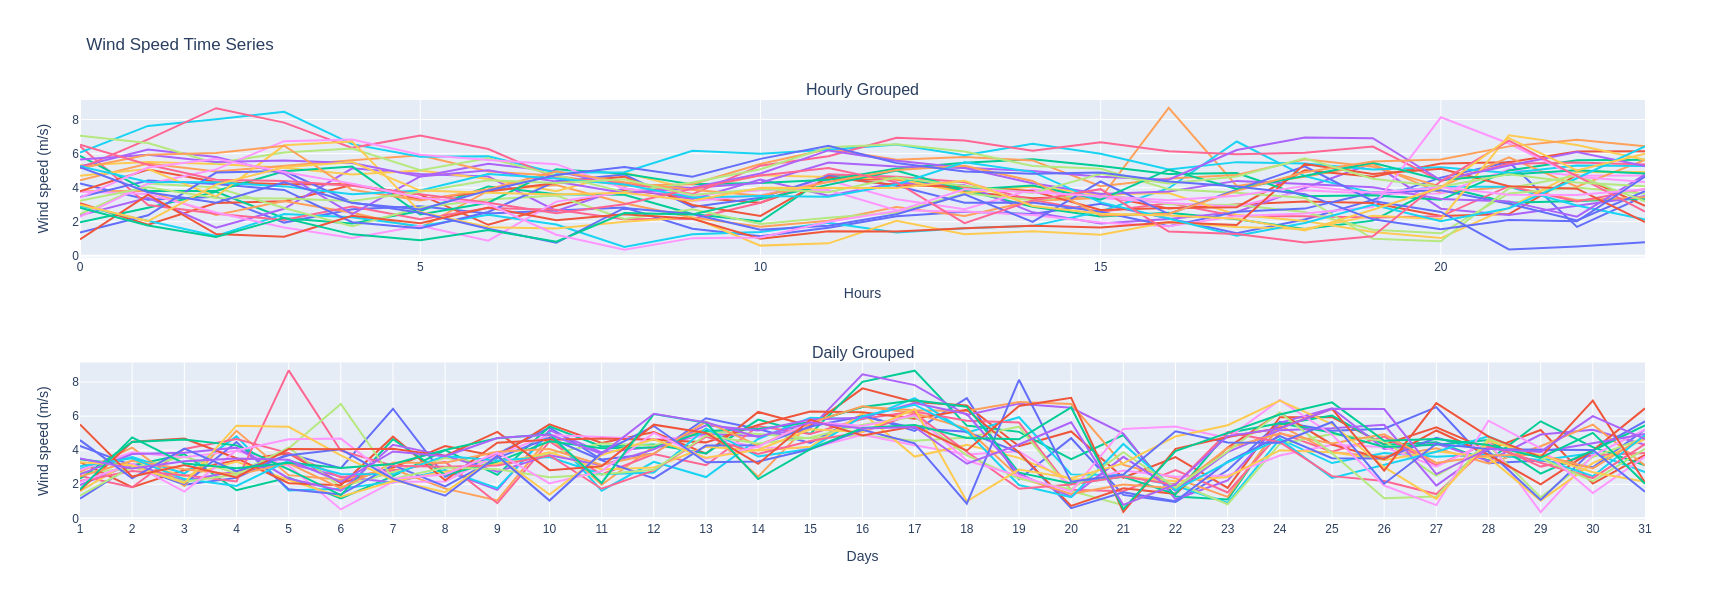

In [4]:
daily_fig = px.line(df.T, title="Wind speed time series")
hourly_fig = px.line(df, title="Wind speed time series")
    
fig = make_subplots(rows=2, cols=1, subplot_titles=("Hourly Grouped", "Daily Grouped"))
fig.update_layout(height=600, showlegend=False, title_text="Wind Speed Time Series")

for trace in hourly_fig['data']:
    fig.add_trace(trace, row=1, col=1)
for trace in daily_fig['data']:
    fig.add_trace(trace, row=2, col=1)
    
fig.update_xaxes(title_text="Hours", row=1, col=1)
fig.update_xaxes(title_text="Days", row=2, col=1)

fig.update_yaxes(title_text="Wind speed (m/s)", row=1, col=1)
fig.update_yaxes(title_text="Wind speed (m/s)", row=2, col=1)
    
fig.show()

### **Notes**

The records already show that, even though the wind behaviour is the same, observing it from a diferent time perspective might be a good way to find correlations.

Another thing that becomes clear is that, ploting the records alone is not suficient to understand the statistical behaviour of the feature. The next cells addresses this issue 

## Statistical Behaviour

> At this point it is important to highlight that we are dealing with a time series, because of that the main statistical measurements will be obtained from a "point of view". For example, if we observe the measurements grouped by hour, we would have 31 records for every hour (1 for each day), hence any statistical measure will be obtained regarding a sample of 31 measurements.

### Mean, Standard Deviation and Box Plot Analysis

The following cell creates a function used to plot the data using statistical calculations. Each plot contains two subplots. In the first one, the main objective is to observe the average wind speed from two diferent perspectives (daily or hourly). The second plot is a very powerfull statistical tool, the **Box Plot**, which allows the observation of important statistical measurements, such as the median values, the outliers and the quarters.

In [5]:
def plot_graphs(df: pd.DataFrame, x_axis_title=str):
    mean = go.Scatter(
            name='Mean',
            x=df.columns,
            y=df.mean(),
            mode='lines')
    std1 = go.Scatter(
            name='Upper',
            x=df.columns,
            y=df.mean()+df.std(),
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False)
    std2 = go.Scatter(
            name='Lower',
            x=df.columns,
            y=df.mean()-df.std(),
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(163, 172, 247, 0.3)',
            fill='tonexty',
            showlegend=False)

    box_fig = px.box(df,labels={"value": "Wind Velocity (m/s)","hour": "Hour of the day"})
    box = box_fig['data'][0]
    
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Mean and Standard Deviation", "Box Plot"), shared_yaxes=True)
    fig.update_layout(height=600)
    fig.add_trace(mean, row=1, col=1)
    fig.add_trace(std1, row=1, col=1)
    fig.add_trace(std2, row=1, col=1)
    fig.add_trace(box, row=2, col=1)
    
    fig.update_xaxes(title_text=x_axis_title, row=1, col=1)
    fig.update_xaxes(title_text=x_axis_title, row=2, col=1)
    
    fig.show()

#### **Hourly Grouped**

By transposing the dataset, we achieve a "hourly" point of view.

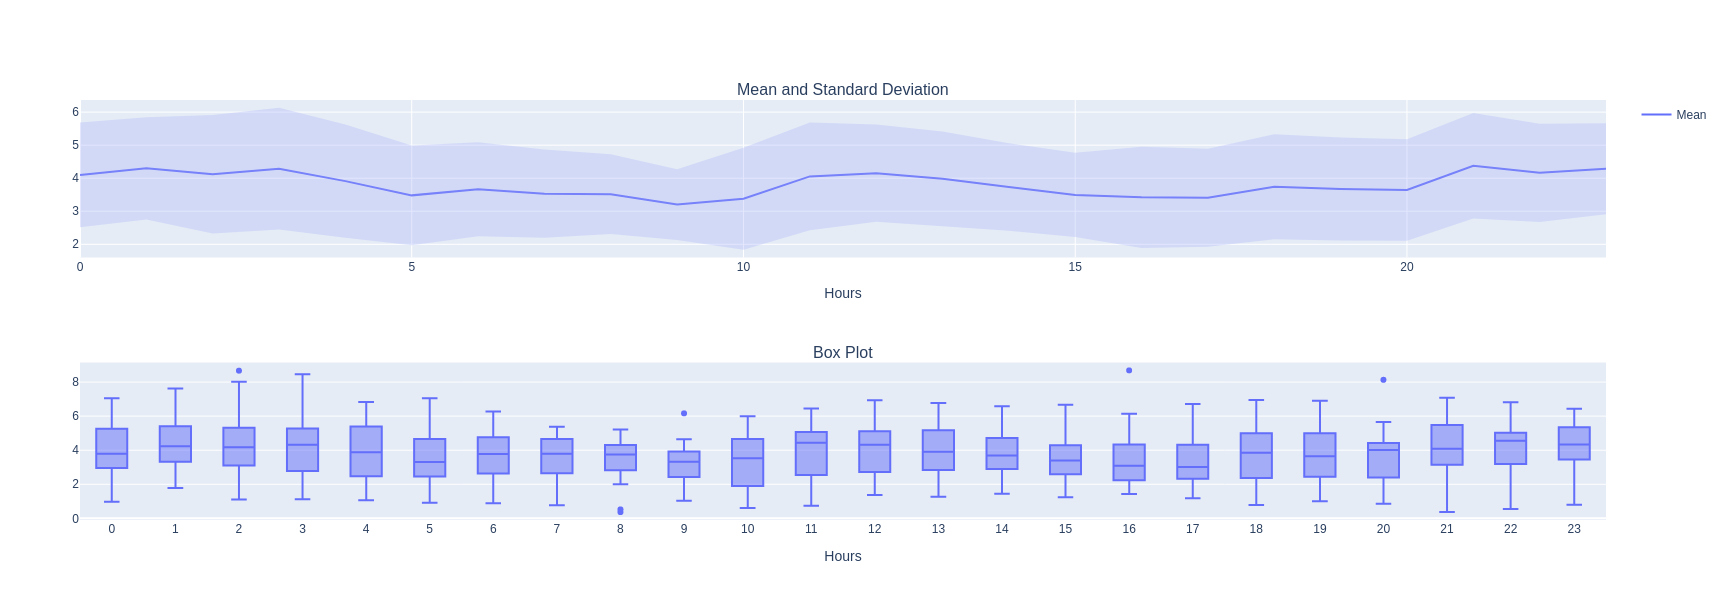

In [6]:
plot_graphs(df=df.T.copy(), x_axis_title="Hours")

#### **Statistics**

In [7]:
statistics_df = df.T.describe()
display(statistics_df.round(2))

hour      0      1      2      3      4      5      6      7      8      9   \
count  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00   
mean    4.10   4.30   4.12   4.29   3.91   3.48   3.66   3.53   3.52   3.20   
std     1.59   1.55   1.79   1.84   1.71   1.51   1.42   1.34   1.21   1.07   
min     0.97   1.79   1.10   1.12   1.06   0.92   0.89   0.76   0.36   1.04   
25%     2.97   3.35   3.11   2.79   2.49   2.48   2.69   2.64   2.83   2.44   
50%     3.79   4.23   4.18   4.32   3.88   3.32   3.78   3.79   3.74   3.33   
75%     5.25   5.39   5.24   5.25   5.34   4.66   4.73   4.63   4.31   3.91   
max     7.05   7.63   8.67   8.46   6.83   7.06   6.27   5.38   5.21   6.16   

hour      10     11     12     13     14     15     16     17     18     19  \
count  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00  31.00   
mean    3.38   4.05   4.15   3.98   3.73   3.50   3.42   3.41   3.74   3.67   
std     1.54   1.63   1.47   1.43   1.32   1.28   1.53   1.48   1.59   1.56   
min     0.60   0.73   1.37   1.27   1.44   1.25   1.42   1.17   0.78   1.00   
25%     1.94   2.86   2.78   2.93   2.91   2.58   2.28   2.33   2.41   2.53   
50%     3.53   4.44   4.32   3.91   3.68   3.39   3.09   3.02   3.85   3.65   
75%     4.60   4.98   5.09   5.17   4.61   4.23   4.31   4.25   4.97   4.94   
max     5.99   6.46   6.93   6.77   6.58   6.67   8.69   6.71   6.94   6.91   

hour      20     21     22     23  
count  31.00  31.00  31.00  31.00  
mean    3.64   4.38   4.16   4.29  
std     1.54   1.60   1.49   1.38  
min     0.86   0.38   0.54   0.79  
25%     2.46   3.16   3.20   3.47  
50%     4.01   4.09   4.55   4.34  
75%     4.42   5.45   5.02   5.32  
max     8.13   7.08   6.81   6.43

#### **Daily Grouped**

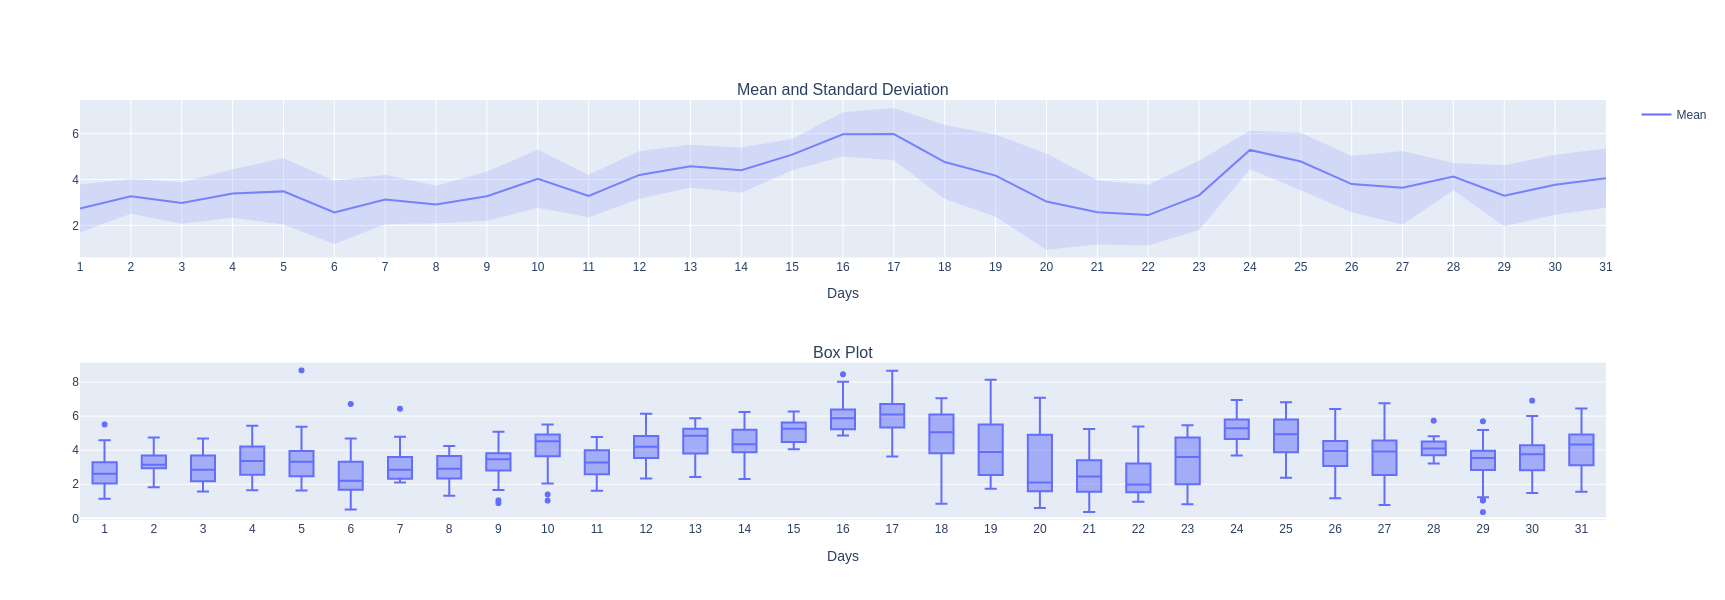

In [8]:
plot_graphs(df=df.copy(), x_axis_title="Days")

#### **Statistics**

In [9]:
statistics_df = df.describe()
display(statistics_df.round(2))

1      2      3      4      5      6      7      8      9     10  \
count  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00   
mean    2.74   3.27   2.98   3.39   3.48   2.57   3.13   2.91   3.27   4.03   
std     1.04   0.76   0.90   1.06   1.44   1.38   1.08   0.82   1.08   1.26   
min     1.16   1.82   1.57   1.65   1.64   0.52   2.10   1.33   0.89   1.04   
25%     2.09   2.94   2.20   2.57   2.50   1.71   2.32   2.39   2.85   3.67   
50%     2.62   3.15   2.86   3.37   3.33   2.20   2.85   2.91   3.47   4.52   
75%     3.29   3.64   3.66   4.18   3.89   3.14   3.43   3.65   3.80   4.93   
max     5.51   4.75   4.69   5.44   8.69   6.71   6.44   4.24   5.08   5.52   

          11     12     13     14     15     16     17     18     19     20  \
count  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00   
mean    3.28   4.20   4.58   4.41   5.09   5.97   5.98   4.76   4.17   3.04   
std     0.93   1.04   0.93   0.99   0.68   0.97   1.14   1.61   1.79   2.09   
min     1.62   2.35   2.42   2.30   4.06   4.86   3.62   0.86   1.74   0.60   
25%     2.59   3.66   3.81   3.93   4.51   5.26   5.35   3.87   2.58   1.60   
50%     3.27   4.21   4.85   4.35   5.26   5.88   6.10   5.06   3.90   2.10   
75%     3.93   4.74   5.25   5.18   5.63   6.31   6.70   6.08   5.44   4.80   
max     4.78   6.14   5.87   6.25   6.27   8.46   8.67   7.05   8.13   7.08   

          21     22     23     24     25     26     27     28     29     30  \
count  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00  24.00   
mean    2.57   2.45   3.31   5.29   4.78   3.80   3.64   4.13   3.30   3.77   
std     1.40   1.32   1.51   0.84   1.25   1.23   1.60   0.59   1.33   1.31   
min     0.38   0.97   0.83   3.68   2.38   1.17   0.78   3.22   0.36   1.48   
25%     1.58   1.58   2.12   4.66   3.88   3.11   2.57   3.72   2.93   2.87   
50%     2.45   1.98   3.61   5.29   4.93   3.96   3.92   4.10   3.55   3.77   
75%     3.32   3.03   4.73   5.73   5.73   4.54   4.51   4.50   3.94   4.24   
max     5.25   5.39   5.47   6.94   6.81   6.42   6.76   5.73   5.70   6.91   

          31  
count  24.00  
mean    4.06  
std     1.29  
min     1.56  
25%     3.11  
50%     4.34  
75%     4.90  
max     6.46